**Given**:<br> 
An array of rectangles in the file test_data.txt. The following is the format of the representation of rectangle:<br>
{rectangle_id, left_bottom_corner_x_coordinate, left_bottom_corner_y_coordinate, right_top_corner_x_coordinate, right_top_corner_y_coordinate}.
<br><br>
Develop python codes in modular fashion to perform the following functions:
Read data corresponding to the rectangular objects from the file test_data.txt. Using matplotlib or any other suitable library plot the given objects in Jupyter IDE.

**Read the test data from a file "test_data.txt". Display the rectangle/s graphically in the Jupyter IDE.**

<Figure size 640x480 with 0 Axes>

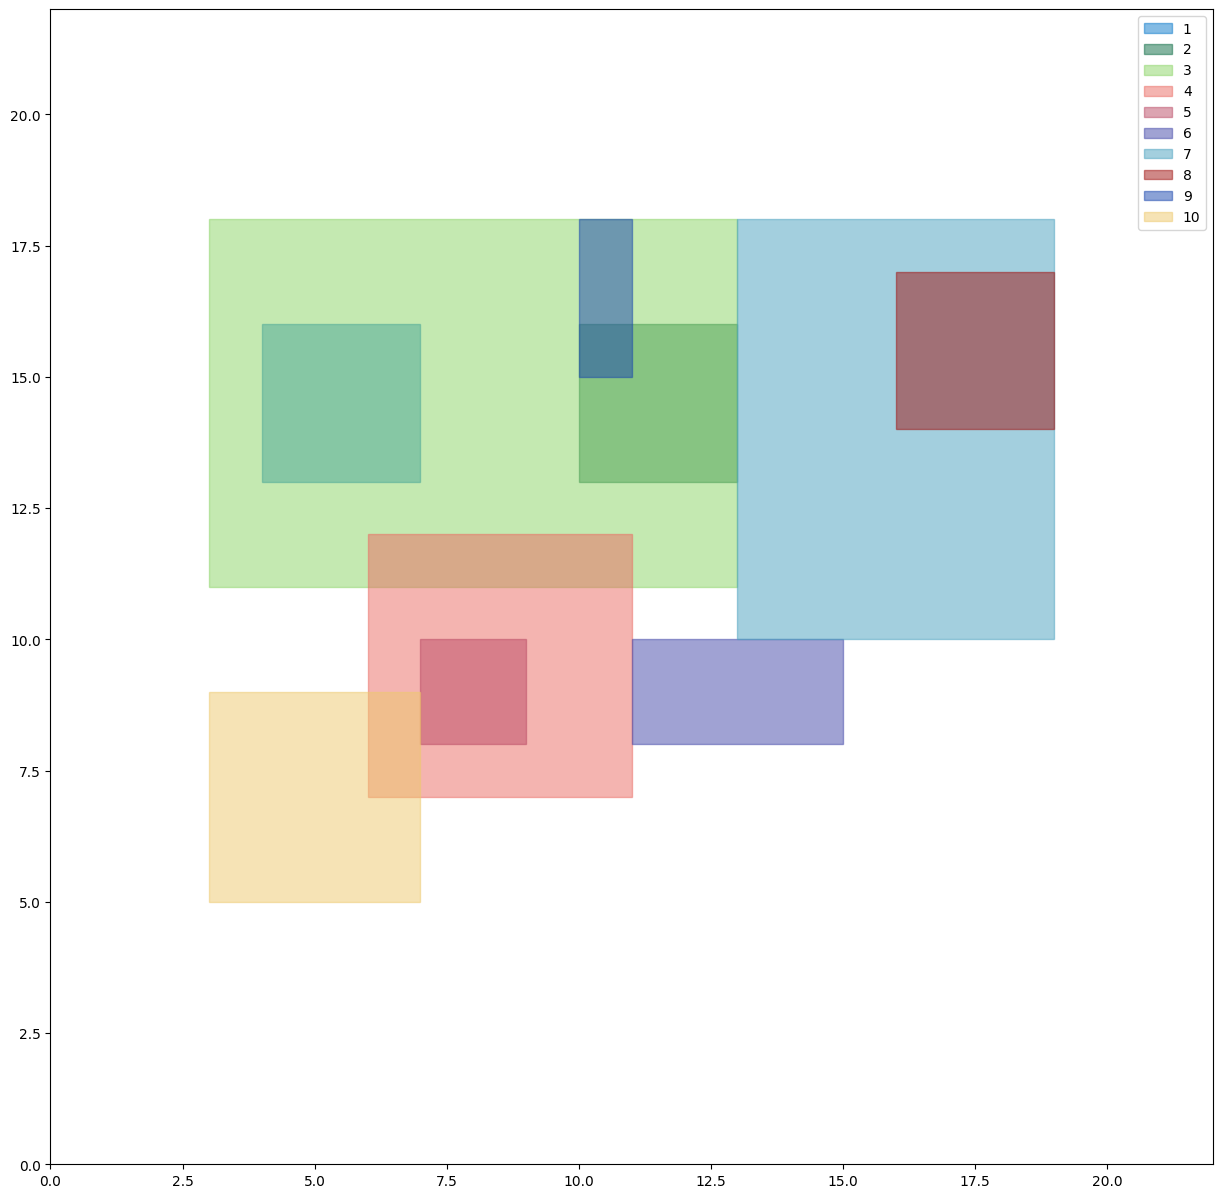

In [35]:
# `class Plot` takes care of all the necessary functions required to plot a rectangle based on the given data using python inbuilt class matplotlib.patches.Rectangle()
# class matplotlib.patches.Rectangle(xy, width, height, *, **kwargs)
# xy: (float, float) The anchor point.
# width: float Rectangle width.
# length: float Rectangle length.

import matplotlib
import matplotlib.pyplot as plt
import random
newList = []


class Plot:
  def __init__(self, num, bottomLeft_x, bottomLeft_y, topRight_x, topRight_y):
    self.num = num 
    self.BL_X = bottomLeft_x
    self.BL_Y = bottomLeft_y
    self.TR_X = topRight_x
    self.TR_Y = topRight_y
    

  def findWidth(self):
    return abs(self.BL_X - self.TR_X)
  

  def findLength(self):
    return abs(self.BL_Y - self.TR_Y)

  def color(self):
    c = "#"+''.join([random.choice('0123456789ABCDEF') for i in range(6)])
    return c
      
  def rect(self):
    rect1 = matplotlib.patches.Rectangle((self.BL_X, self.BL_Y),
                                     self.findWidth(), self.findLength(),
                                     color = self.color(), label = self.num, alpha = 0.50)
    return rect1


fig = plt.figure()
fig=plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
test = Plot(num=0, bottomLeft_x=0, bottomLeft_y=0, topRight_x=0, topRight_y=0)

# given data
with open('test_data.txt','r') as f:
  data = f.readlines()
  newList = []
  allRect = []
  maxLim = 0
  for line in data:
    new = line.replace('{','').replace('}','').replace('\n','').replace(' ','').split(',')
    new = new[0:5]
    try:
        newList = [eval(x) for x in new]
        allRect.append(newList)

        if (maxLim < max(newList)):
          maxLim = max(newList)

        if len(newList) == 5:
          test.num = newList[0]
          test.BL_X = newList[1]
          test.BL_Y = newList[2]
          test.TR_X = newList[3]
          test.TR_Y = newList[4]
          ax.add_patch(test.rect())
        else:
          continue     
    except:
        pass

plt.xlim([0, maxLim+3])
plt.ylim([0, maxLim+3])
plt.legend()  
plt.get_current_fig_manager().full_screen_toggle()
plt.show()

**Problems to be solved using Python:**</br><hr/>
Q1) Accept input {x, y} from the keyboard. Print if this point lies within any of the rectangles in the given test data set. If yes then list the rectangles enclosing the given point in the format {rectangle_id, rectangle_id, rectangle_id, ... rectangle_id}. Eg: {1, 5, 8} implies that given point(x, y) is enclosed in the rectangles 1, 5 and 8.


In [2]:
# `checkCoord` function checks for the condition if the given {x,y} us within any of the rectangles in the given test data

import ast
raw_input = input("Enter the coords. Should be in format x,y:")
coords = sorted(ast.literal_eval(raw_input))

class Point:
  def __init__(self, num, bottomLeft_x, bottomLeft_y, topRight_x, topRight_y,x,y):
    self.num = num 
    self.BL_X = bottomLeft_x
    self.BL_Y = bottomLeft_y
    self.TR_X = topRight_x
    self.TR_Y = topRight_y
    self.x = x
    self.y = y
  
  def checkCoord(self):
    if (self.x >= self.BL_X and self.x < self.TR_X) and (self.y >= self.BL_Y and self.y <= self.TR_Y):
      return self.num

# Example Usage
# test = Point(4, 4, 13, 7, 16, coords[0], coords[1])
# print(test.checkCoord())

test = Point(num=0, bottomLeft_x=0, bottomLeft_y=0, topRight_x=0, topRight_y=0, x=coords[0],y= coords[1])
rectList = []

with open('test_data.txt','r') as f :
    data = f.readlines()
    newList = []
    for line in data:
        new = line.replace('{','').replace('}','').replace('\n','').replace(' ','').split(',')
        new = new[0:5]
        try:
            newList = [eval(x) for x in new]
            if len(newList) != 0:
              test.num = newList[0]
              test.BL_X = newList[1]
              test.BL_Y = newList[2]
              test.TR_X = newList[3]
              test.TR_Y = newList[4]
              c = test.checkCoord()
              if c != None:
                rectList.append(c)
            else:
              continue     
        except:
            pass

print(rectList)

[1, 3]


<hr/>
Q2) List of rectangles that don't overlap any other rectangles. The output should be in the format {rectangle_id, rectangle_id, rectangle_id, ... rectangle_id} <br> <hr/>

Q3) List of rectangles that overlap with other rectangles in the format {{rectangle_id, list_of_rectangle_ids_which_are_overlapping_with_it}, {rectangle_id, list_of_rectangle_ids_which_are_overlapping_with_it}, ..... {rectangle_id, list_of_rectangle_ids_which_are_overlapping_with_it}}
Eg: {{5, 7, 9, 12}, {6, 10, 12}} implies that rectangle 5 overlaps with rectangles 7, 9 and 12; rectangle 6 overlaps with rectangles 10 and 12.<hr/>


In [3]:
# `rectangles_overlap` checks if two rectangles overlap by comparing the 
# coordinates of their bottom left and top right points.

# `fun`` takes in the list of all the rectangles and loops through each rectangle to check if it overlaps with other/any rectangles and stores the label values in two different lists 
# being overlapping[] & non-overlapping[] 

def rect_overlap(rect1, rect2):
    # Check if two rectangles overlap
    id_a, x1_BL, y1_BL, x1_TR, y1_TR = rect1
    id_b, x2_BL, y2_BL, x2_TR, y2_TR = rect2
    return (x1_BL < x2_TR) and (x1_TR > x2_BL) and (y1_BL < y2_TR) and (y1_TR > y2_BL)

def fun(rectangles):
    non_overlapping = []
    new = []
    for i, rect1 in enumerate(rectangles):
        overlapping = []
        overlaps = False
        overlapping.append(rect1[0])
        for rect2 in rectangles[:i] + rectangles[i+1:]:
            if rect_overlap(rect1, rect2):
                overlapping.append(rect2[0])
                overlaps = True
                break
        if not overlaps:
            non_overlapping.append(rect1[0])
        if overlaps:
            new.append(overlapping)  
    return non_overlapping, new

List1, List2 = fun(allRect)


print(f'No Overlap with any other rectangels: {List1}')
print(f'Rectangles which overlaps with other rectangels: {List2}')



No Overlap with any other rectangels: [6]
Rectangles which overlaps with other rectangels: [[1, 3], [2, 3], [3, 1], [4, 3], [5, 4], [7, 8], [8, 7], [9, 2], [10, 4]]


<hr/>
Q4) List of rectangles that contain other rectangles in the format {rectangle_id, list_of_rectangle_ids_which_are_contained_in}<br>
Eg: {{5, 2, 6}, {4, 3, 9}} implies that rectangle 5 contains rectangles 2 and 6; rectangle 4 contains rectangles 3 and 9.<br><hr/>

In [4]:
# `rectangles_contain` checks if  if one rectangle contains another by comparing the 
# coordinates of their bottom left and top right points.

# `containingRectangles` takes in the list of all the rectangles and loops through each rectangle to check if it that rectangle contains other rectangles and return the list of labels that are contained by it

def rectangles_contain(rect1, rect2):
    # Check if two rectangles overlap
    id_a, x1_BL, y1_BL, x1_TR, y1_TR = rect1
    id_b, x2_BL, y2_BL, x2_TR, y2_TR = rect2
    return x2_BL >= x1_BL and x2_TR <= x1_TR and y2_BL >= y1_BL and y2_TR <= y1_TR
   

def containingRectangles(rectangles):
    containing = []
    for i, rect1 in enumerate(rectangles):
        contained = []
        contained.append(rect1[0])
        for rect2 in rectangles[:i] + rectangles[i+1:]:
            if rectangles_contain(rect1, rect2):
                contained.append(rect2[0])
        if len(contained)>1:
            containing.append(contained)
    return containing

List3 = containingRectangles(allRect)

print(f'List of rectangels that contain other rectangles: {List3}')

List of rectangels that contain other rectangles: [[3, 1, 2, 9], [4, 5], [7, 8]]


<hr/>

Q5) List the rectangles that are abutting each other in the following format {rectangle_id, which side_(e, w, n, s), rectangle_id_of_abutting_rectangle_id}
Eg: {{5, n, 7}, {4, e, 3}} implies that rectangle 5 has rectangle 7 abutting it on the northern side, rectangle 4 has rectangle 3 abutting it on the eastern side.<hr/>

In [5]:
# `rectangles_abut` checks if two rectangles are abutting each 
# other by comparing their bottom left and top right coordinates.

# `abutting_rectangles`takes a list of rectangles, and returns a list of tuples, 
# where each tuple contains the index of a rectangle, the side it is abutting another rectangle on 
# and the index of the abutting rectangle. The function loops through each rectangle, 
# and checks if it is abutting any other rectangles. If it is abutting another rectangle, 
# the tuple with the information is added to the list of abutting rectangles


def rectangles_abut(rect1, rect2):
    a, x1_BL, y1_BL, x1_TR, y1_TR = rect1
    b, x2_BL, y2_BL, x2_TR, y2_TR = rect2

    if y1_TR == y2_BL and x1_BL <= x2_TR and x1_TR >= x2_BL:
        return "n", "s"
    if y1_BL == y2_TR and x1_BL <= x2_TR and x1_TR >= x2_BL:
        return "s", "n"
    if x1_TR == x2_BL and y1_BL <= y2_TR and y1_TR >= y2_BL:
        return "e", "w"
    if x1_BL == x2_TR and y1_BL <= y2_TR and y1_TR >= y2_BL:
        return "w", "e"
    return None

def abutting_rectangles(rectangles):
    abutting = []
    for i, rect1 in enumerate(rectangles):
        for j, rect2 in enumerate(rectangles):
            if i != j:
                sides = rectangles_abut(rect1, rect2)
                if sides:
                    abutting.append((rect1[0], sides[0], rect2[0]))
                    abutting.append((rect2[0], sides[1], rect1[0]))
    return abutting

List4 = abutting_rectangles(allRect)

print(f'List of rectangels abutting eachother: {List4}')

List of rectangels abutting eachother: [(2, 'e', 7), (7, 'w', 2), (3, 'e', 7), (7, 'w', 3), (4, 'e', 6), (6, 'w', 4), (5, 'w', 10), (10, 'e', 5), (6, 'w', 4), (4, 'e', 6), (6, 'n', 7), (7, 's', 6), (7, 'w', 2), (2, 'e', 7), (7, 'w', 3), (3, 'e', 7), (7, 's', 6), (6, 'n', 7), (10, 'e', 5), (5, 'w', 10)]
